
Jumlah sampel di setiap kelas:
booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64


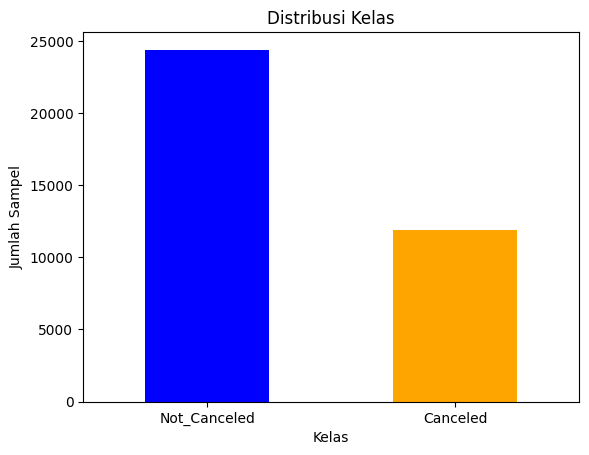

In [27]:
import pandas as pd

# Ganti dengan path ke dataset Anda
file_path = 'booking.csv'  # Sesuaikan nama file
dataset = pd.read_csv(file_path)

# Asumsikan kolom target bernama 'Status' (ganti jika berbeda)
target_column = 'booking status'  # Ubah ke nama kolom target sebenarnya

# Hitung jumlah sampel untuk setiap label
if target_column in dataset.columns:
    class_counts = dataset[target_column].value_counts()
    print("\nJumlah sampel di setiap kelas:")
    print(class_counts)

    # Visualisasi distribusi kelas
    try:
        import matplotlib.pyplot as plt
        class_counts.plot(kind='bar', color=['blue', 'orange'], title='Distribusi Kelas')
        plt.xlabel('Kelas')
        plt.ylabel('Jumlah Sampel')
        plt.xticks(rotation=0)
        plt.show()
    except ImportError:
        print("\nMatplotlib tidak tersedia. Instal dengan `pip install matplotlib` untuk visualisasi.")
else:
    print(f"\nKolom target '{target_column}' tidak ditemukan. Pastikan nama kolom target benar.")



Jumlah sampel di setiap kelas:
booking status
Canceled        8000
Not_Canceled    8000
Name: count, dtype: int64


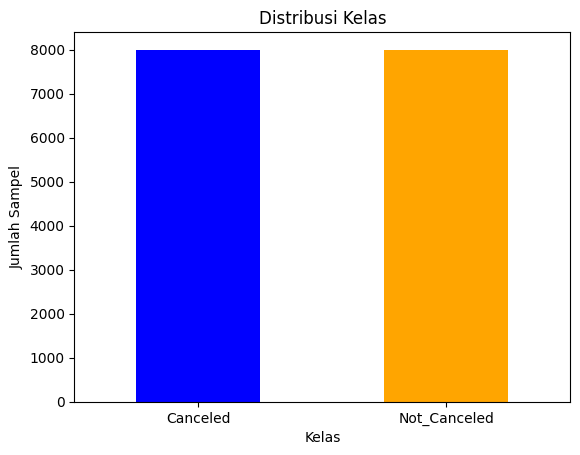

In [34]:
import pandas as pd

# Ganti dengan path ke dataset Anda
file_path = 'dataset_9999_cleaned.csv'  # Sesuaikan nama file
dataset = pd.read_csv(file_path)

# Asumsikan kolom target bernama 'Status' (ganti jika berbeda)
target_column = 'booking status'  # Ubah ke nama kolom target sebenarnya

# Hitung jumlah sampel untuk setiap label
if target_column in dataset.columns:
    class_counts = dataset[target_column].value_counts()
    print("\nJumlah sampel di setiap kelas:")
    print(class_counts)

    # Visualisasi distribusi kelas
    try:
        import matplotlib.pyplot as plt
        class_counts.plot(kind='bar', color=['blue', 'orange'], title='Distribusi Kelas')
        plt.xlabel('Kelas')
        plt.ylabel('Jumlah Sampel')
        plt.xticks(rotation=0)
        plt.show()
    except ImportError:
        print("\nMatplotlib tidak tersedia. Instal dengan `pip install matplotlib` untuk visualisasi.")
else:
    print(f"\nKolom target '{target_column}' tidak ditemukan. Pastikan nama kolom target benar.")


In [29]:
from sklearn.model_selection import train_test_split

# Asumsikan kolom target bernama 'Status' (ganti jika berbeda)
target_column = 'booking status'  # Ubah ke nama kolom target

# Pisahkan fitur (X) dan target (y)
X = dataset.drop(columns=[target_column])  # Semua kolom kecuali kolom target
y = dataset[target_column]

# Encode target menjadi 0 dan 1 jika masih berupa teks
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)  # Misal: 'Canceled' -> 1, 'Not_Canceled' -> 0

# Pemisahan data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Cek ukuran data yang dihasilkan
print(f"Ukuran data latih: {X_train.shape}")
print(f"Ukuran data uji: {X_test.shape}")


Ukuran data latih: (12800, 14)
Ukuran data uji: (3200, 14)


ll

In [30]:
def custom_train_test_split(dataset, target_column, test_size=0.2, seed=42):
    # Handle different input types
    if isinstance(dataset, list):
        # If it's already a list of dictionaries
        data = dataset
    elif hasattr(dataset, 'to_dict'):
        # If it's a pandas DataFrame
        data = dataset.to_dict('records')
    else:
        # Convert other types to list of dictionaries if possible
        try:
            data = list(dataset)
        except TypeError:
            raise TypeError("Dataset must be a list, DataFrame, or convertible to list of dictionaries")
    
    def pseudo_random(seed):
        # A simple linear congruential generator
        a = 1664525
        c = 1013904223
        m = 2**32
        while True:
            seed = (a * seed + c) % m
            yield seed / m
    
    # Create a generator with the given seed
    random_gen = pseudo_random(seed)
    
    # Separate features and target
    features = []
    targets = []
    
    for row in data:
        # Create a deep copy of the row
        feature_row = dict(row)
        # Remove the target column from features
        target = feature_row.pop(target_column)
        
        features.append(feature_row)
        targets.append(target)
    
    # Create a list of indices with associated random values
    indexed_data = [(i, next(random_gen)) for i in range(len(data))]
    
    # Sort by the random values to "shuffle"
    indexed_data.sort(key=lambda x: x[1])
    
    # Get sorted indices
    sorted_indices = [item[0] for item in indexed_data]
    
    # Calculate split point
    split_point = int(len(sorted_indices) * (1 - test_size))
    
    # Split indices
    train_indices = sorted_indices[:split_point]
    test_indices = sorted_indices[split_point:]
    
    # Create training and test sets
    X_train = [features[i] for i in train_indices]
    X_test = [features[i] for i in test_indices]
    
    y_train = [targets[i] for i in train_indices]
    y_test = [targets[i] for i in test_indices]
    
    return X_train, X_test, y_train, y_test

def custom_label_encoder(labels):
    # Create a mapping of unique labels to binary values
    unique_labels = list(set(labels))
    label_map = {label: index for index, label in enumerate(unique_labels)}
    
    # Encode labels
    encoded_labels = [label_map[label] for label in labels]
    
    return encoded_labels, label_map

# Example usage:
# Assuming 'dataset' is your input data
# target_column = 'booking status'

# Split the data
X_train, X_test, y_train, y_test = custom_train_test_split(dataset, target_column, test_size=0.2, seed=42)

# Encode labels
y_train_encoded, label_map = custom_label_encoder(y_train)
y_test_encoded, _ = custom_label_encoder(y_test)

# Print results
print(f"Ukuran data latih: {len(X_train)}")
print(f"Ukuran data uji: {len(X_test)}")
print("Label mapping:", label_map)

Ukuran data latih: 12800
Ukuran data uji: 3200
Label mapping: {'Canceled': 0, 'Not_Canceled': 1}


Data Latih:

Ukuran: (12800, 14) berarti data latih memiliki 12.800 baris (sampel) dan 14 kolom (fitur).
Data ini digunakan untuk melatih model machine learning agar dapat mempelajari pola dari fitur-fitur yang tersedia.
Data Uji:

Ukuran: (3200, 14) berarti data uji memiliki 3.200 baris (sampel) dan 14 kolom (fitur).
Data ini digunakan untuk menguji kinerja model setelah dilatih. Model akan memprediksi label pada data uji, dan hasil prediksi ini akan dibandingkan dengan label sebenarnya untuk mengevaluasi akurasi dan performa model.
Proporsi 80:20:

Total data adalah 16.000 sampel (12.800 + 3.200), dan pemisahan ini sesuai dengan parameter test_size=0.2 yang artinya 20% data digunakan untuk uji dan 80% untuk latih.
stratify:

Dengan stratify=y_encoded, distribusi kelas dalam data latih dan uji tetap proporsional terhadap distribusi awal dataset. Ini penting untuk mencegah model "bias" terhadap kelas mayoritas.

MODEL

In [31]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split


data = pd.read_csv('dataset_9999_cleaned.csv')  # Ganti dengan path dataset Anda
# Tentukan kolom target
target_column = 'booking status'

# Tentukan kolom kategorikal sesuai dataset
categorical_columns = ['type of meal', 'room type', 'market segment type']

# Pastikan kolom numerik tidak termasuk kolom target
numerical_columns = data.select_dtypes(exclude=['object']).columns.tolist()

# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=[target_column])  # Semua kolom kecuali kolom target
y = data[target_column]

# Encode target menjadi 0 dan 1
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Setup pipeline untuk menangani data numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_columns),  # Imputasi numerik
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # OneHotEncoding untuk kolom kategorikal
    ]
)

# Pemisahan data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Terapkan preprocessing pada fitur (X) dan latih model RandomForest
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Inisialisasi model RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model menggunakan data yang sudah diproses
rf_model.fit(X_train_processed, y_train)

# Prediksi pada data uji
y_pred = rf_model.predict(X_test_processed)

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

conf_matrix, class_report, accuracy


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['Unnamed: 12' 'Unnamed: 13' 'Unnamed: 14']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


(array([[1354,  246],
        [ 209, 1391]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.87      0.85      0.86      1600\n           1       0.85      0.87      0.86      1600\n\n    accuracy                           0.86      3200\n   macro avg       0.86      0.86      0.86      3200\nweighted avg       0.86      0.86      0.86      3200\n',
 0.8578125)

In [32]:
# Print hasil evaluasi dengan format yang lebih rapi
print("=== Confusion Matrix ===")
print(conf_matrix)
print("\n=== Classification Report ===")
print(class_report)
print("\n=== Accuracy ===")
print(f"Akurasi: {accuracy * 100:.2f}%")


=== Confusion Matrix ===
[[1354  246]
 [ 209 1391]]

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1600
           1       0.85      0.87      0.86      1600

    accuracy                           0.86      3200
   macro avg       0.86      0.86      0.86      3200
weighted avg       0.86      0.86      0.86      3200


=== Accuracy ===
Akurasi: 85.78%


In [33]:
# Fungsi untuk membaca CSV secara manual
def read_csv(file_path):
    data = []
    with open(file_path, 'r') as file:
        # Baca header
        header = file.readline().strip().split(',')
        
        # Baca baris data
        for line in file:
            # Pisahkan nilai-nilai kolom
            values = line.strip().split(',')
            
            # Buat dictionary untuk setiap baris
            row_dict = {}
            for i, col_name in enumerate(header):
                # Coba konversi ke numerik jika memungkinkan
                try:
                    row_dict[col_name] = float(values[i])
                except ValueError:
                    row_dict[col_name] = values[i]
            
            data.append(row_dict)
    
    return data, header

# Fungsi untuk membagi data tanpa library random
def custom_train_test_split(data, test_size=0.2, seed=42):
    def pseudo_random(seed):
        a = 1664525
        c = 1013904223
        m = 2**32
        while True:
            seed = (a * seed + c) % m
            yield seed / m
    
    random_gen = pseudo_random(seed)
    
    # Buat list dengan indeks dan nilai acak
    indexed_data = [(i, next(random_gen)) for i in range(len(data))]
    
    # Urutkan berdasarkan nilai acak
    indexed_data.sort(key=lambda x: x[1])
    
    # Ambil indeks yang sudah diurutkan
    sorted_indices = [item[0] for item in indexed_data]
    
    # Hitung titik pembagian
    split_point = int(len(sorted_indices) * (1 - test_size))
    
    # Bagi indeks
    train_indices = sorted_indices[:split_point]
    test_indices = sorted_indices[split_point:]
    
    # Buat data latih dan uji
    train_data = [data[i] for i in train_indices]
    test_data = [data[i] for i in test_indices]
    
    return train_data, test_data

# Fungsi untuk encoding label
def custom_label_encoder(labels):
    unique_labels = list(set(labels))
    label_map = {label: index for index, label in enumerate(unique_labels)}
    
    encoded_labels = [label_map[label] for label in labels]
    
    return encoded_labels, label_map

# Fungsi untuk one-hot encoding
def one_hot_encoding(data, categorical_columns):
    # Temukan unique values untuk setiap kolom kategorikal
    unique_values = {}
    for col in categorical_columns:
        unique_values[col] = list(set(row[col] for row in data))
    
    # Buat one-hot encoding
    encoded_data = []
    for row in data:
        encoded_row = row.copy()
        
        # Hapus kolom kategorikal asli
        for col in categorical_columns:
            del encoded_row[col]
        
        # Tambahkan kolom one-hot
        for col in categorical_columns:
            for val in unique_values[col]:
                encoded_row[f'{col}_{val}'] = 1 if row[col] == val else 0
        
        encoded_data.append(encoded_row)
    
    return encoded_data, unique_values

# Fungsi untuk imputasi (mengganti nilai yang hilang)
def simple_imputer(data, strategy='mean'):
    # Identifikasi kolom numerik
    numeric_columns = []
    for col in data[0].keys():
        if isinstance(data[0][col], (int, float)):
            numeric_columns.append(col)
    
    # Hitung rata-rata untuk kolom numerik
    column_means = {}
    for col in numeric_columns:
        column_means[col] = sum(row[col] for row in data) / len(data)
    
    # Imputasi
    imputed_data = []
    for row in data:
        new_row = row.copy()
        for col in numeric_columns:
            # Ganti dengan rata-rata jika nilainya hilang
            if new_row[col] is None or new_row[col] == '':
                new_row[col] = column_means[col]
        imputed_data.append(new_row)
    
    return imputed_data

# Fungsi untuk Random Forest sederhana
class SimpleRandomForest:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []
    
    def _bootstrap_sample(self, data, labels):
        # Sampling dengan pengembalian
        n_samples = len(data)
        indices = [int(next_random() * n_samples) for _ in range(n_samples)]
        return [data[i] for i in indices], [labels[i] for i in indices]
    
    def _gini_impurity(self, labels):
        # Hitung impuritas Gini
        label_counts = {}
        for label in labels:
            label_counts[label] = label_counts.get(label, 0) + 1
        
        impurity = 1.0
        for count in label_counts.values():
            prob = count / len(labels)
            impurity -= prob ** 2
        
        return impurity
    
    def _best_split(self, data, labels):
        # Cari split terbaik
        best_gini = float('inf')
        best_feature = None
        best_threshold = None
        
        for feature in data[0].keys():
            if not isinstance(data[0][feature], (int, float)):
                continue
            
            # Gunakan median sebagai threshold
            sorted_data = sorted(enumerate(data), key=lambda x: x[1][feature])
            threshold = sorted_data[len(sorted_data)//2][1][feature]
            
            left_labels = [labels[i] for i, row in enumerate(data) if row[feature] <= threshold]
            right_labels = [labels[i] for i, row in enumerate(data) if row[feature] > threshold]
            
            gini = (len(left_labels)/len(labels)) * self._gini_impurity(left_labels) + \
                   (len(right_labels)/len(labels)) * self._gini_impurity(right_labels)
            
            if gini < best_gini:
                best_gini = gini
                best_feature = feature
                best_threshold = threshold
        
        return best_feature, best_threshold
    
    def _train_tree(self, data, labels, depth=0):
        # Cek kondisi berhenti
        if depth == self.max_depth or len(set(labels)) == 1:
            # Kembalikan label yang paling umum
            return max(set(labels), key=labels.count)
        
        # Cari split terbaik
        feature, threshold = self._best_split(data, labels)
        
        if feature is None:
            return max(set(labels), key=labels.count)
        
        # Bagi data
        left_indices = [i for i, row in enumerate(data) if row[feature] <= threshold]
        right_indices = [i for i, row in enumerate(data) if row[feature] > threshold]
        
        # Buat node
        node = {
            'feature': feature,
            'threshold': threshold,
            'left': self._train_tree([data[i] for i in left_indices], 
                                     [labels[i] for i in left_indices], 
                                     depth+1),
            'right': self._train_tree([data[i] for i in right_indices], 
                                      [labels[i] for i in right_indices], 
                                      depth+1)
        }
        
        return node
    
    def fit(self, data, labels):
        # Seed untuk reproducibility
        global next_random
        next_random = pseudo_random(42).__next__
        
        # Latih sejumlah pohon
        self.trees = []
        for _ in range(self.n_estimators):
            # Bootstrap sampling
            bootstrap_data, bootstrap_labels = self._bootstrap_sample(data, labels)
            
            # Latih satu pohon
            tree = self._train_tree(bootstrap_data, bootstrap_labels)
            self.trees.append(tree)
    
    def predict(self, data):
        # Prediksi dengan voting
        predictions = []
        for row in data:
            tree_predictions = []
            for tree in self.trees:
                # Telusuri pohon untuk prediksi
                node = tree
                while isinstance(node, dict):
                    if row[node['feature']] <= node['threshold']:
                        node = node['left']
                    else:
                        node = node['right']
                tree_predictions.append(node)
            
            # Ambil label dengan voting terbanyak
            predictions.append(max(set(tree_predictions), key=tree_predictions.count))
        
        return predictions

# Fungsi untuk menghitung confusion matrix
def confusion_matrix(true_labels, pred_labels):
    unique_labels = list(set(true_labels + pred_labels))
    matrix = [[0 for _ in unique_labels] for _ in unique_labels]
    
    for true, pred in zip(true_labels, pred_labels):
        matrix[unique_labels.index(true)][unique_labels.index(pred)] += 1
    
    return matrix

# Fungsi untuk menghitung akurasi
def accuracy_score(true_labels, pred_labels):
    return sum(t == p for t, p in zip(true_labels, pred_labels)) / len(true_labels)

# Fungsi untuk classification report sederhana
def classification_report(true_labels, pred_labels):
    unique_labels = list(set(true_labels + pred_labels))
    report = {}
    
    for label in unique_labels:
        # Hitung precision, recall, f1-score
        true_positives = sum((t == label and p == label) for t, p in zip(true_labels, pred_labels))
        predicted_positives = sum(p == label for p in pred_labels)
        actual_positives = sum(t == label for t in true_labels)
        
        precision = true_positives / predicted_positives if predicted_positives > 0 else 0
        recall = true_positives / actual_positives if actual_positives > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        report[label] = {
            'precision': precision,
            'recall': recall,
            'f1-score': f1,
            'support': actual_positives
        }
    
    return report

# Gunakan fungsi-fungsi di atas
# Baca data dari CSV
data, header = read_csv('dataset_9999_cleaned.csv')

# Tentukan kolom target dan kategorikal
target_column = 'booking status'
categorical_columns = ['type of meal', 'room type', 'market segment type']

# Pisahkan fitur dan target
X = [row for row in data]
y = [row[target_column] for row in data]

# Encode target
y_encoded, label_map = custom_label_encoder(y)

# Imputasi data numerik
X_imputed = simple_imputer(X)

# One-hot encoding untuk kolom kategorikal
X_encoded, _ = one_hot_encoding(X_imputed, categorical_columns)

# Bagi data
X_train, X_test = custom_train_test_split(X_encoded, test_size=0.2, seed=42)
y_train, y_test = custom_train_test_split(y_encoded, test_size=0.2, seed=42)

# Latih model Random Forest
rf_model = SimpleRandomForest(n_estimators=100)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Cetak hasil
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)
print(f"\nAccuracy: {accuracy}")

NameError: name 'pseudo_random' is not defined

In [ ]:
import os
print(os.path.exists("C:/Users/User/Documents/semester 3/kecerdasan artifisial/uas/Biru Simple Kreatif Tugas Kelompok Presentasi.png"))


True
